# Lin (2013)で学ぶSequential Variational Approximation でノンパラベイズ

Variational inference でDirichlet process infinite mixture model をしたくなったので適当に論文を見つけて読んで実装する.



## 1. Introduction

## 2. Related Work

## 3. Nonparametric Mixture Models

$$
D = \sum_{k=1}^{\infty}\pi_k\delta_{\phi_k}, \;
\operatorname{with} \pi_k = v_k\prod_{l=1}^{k-1}v_l, \;
v_k \propto \operatorname{Beta} \left( 1, \alpha_k\right), \;
\forall k = 1, 2, ... \tag{1} \\
$$

$$
D \propto DP\left( \alpha \mu\right), \;
\theta_i \propto \mu , \;
x_i \propto F\left( \cdot \mid \theta_i \right), \;
\forall i = 1, 2, ..., n \tag{2} \\
$$

$$
\begin{eqnarray}
z_{1:n} &\propto& \operatorname{CRP} \left( \alpha \right), \; \phi_k \propto \mu, \; \forall k = 1, 2, ... \\
x_{1:n} &\propto& F\left(\cdot \mid \phi_{z_i} \right), \; \forall i = 1, 2, ..., n  \tag{3}
\end{eqnarray}
$$

$$
p_{\operatorname {CRP}}\left( z_{1:n} \mid \alpha\right) =
\frac {\Gamma(\alpha) \alpha^K} {\Gamma(\alpha + n)} \prod_{k=1}^K \Gamma\left( | C_k| \right) \tag{4}
$$

## 4. Variational Approximation of Posterior

予測分布は以下のようになる.

$$
p\left( \theta'  \mid x_{1:n}\right) = \mathbb E_{D \mid x_{1:n}} \left\lbrack p\left( \theta' \mid D \right) \right\rbrack \tag {5}
$$

### 4.1. Posterior Analysis

$ D $ の事後分布.

$$
\begin{eqnarray}
D \mid \theta_{1:n} &\sim& \operatorname {DP} \left( \tilde {\alpha} \tilde {\mu}\right) \\
\tilde{\alpha} &=& \alpha + n \\
\tilde{\mu} &=& \frac {\alpha} {\alpha+n} \mu + \sum_{k=1}^K \frac {\left| C_k \right|} {\alpha + n} \delta_{\phi_k} \tag{6}
\end{eqnarray}
$$

$ p\left( D \mid z_{1:n}, x_{1:n} \right) $ からのサンプリングは以下のサンプリングと同じ.

$$
\begin{eqnarray}
\beta_0 D' + \sum_{k=1}^K \beta_k \delta_{\phi_k} , &&\\
&& with  \; D' \sim \operatorname {DP} \left( \alpha \mu  \right), \;
\left( \beta_0, \beta_1, ..., \beta_k \right) \sim \operatorname{Dir} \left( \alpha, m_1, ..., m_K \right), \;
\phi_k \sim \mu \mid _{C_k} \tag{7}
\end{eqnarray}
$$

ここで, $m_k = |C_k|$, $\mu \mid _{C_k}$ は 事後分布 $ \mu \mid _{C_k}\left( \operatorname d \theta \right) \propto \mu\left( \operatorname d \theta  \right) \prod_{i\in C_k} F \left( x_i \mid \theta \right)$

つまり$1:n$ までのデータが収まった中華料理店にもう１件データが追加された, という状態. $ \beta_k $ で既存のテーブルkに座り, $\beta_0$で新規テーブルが作られそこに座る. $\beta$の総和は1.

データ $ x_{1:n} $ が得られたときの混合分布 $ D $ の事後確率.

$$
p\left( D \mid x_{1:n} \right) = \sum_{z_{1:n}} p\left(z_{1:n} \mid x_{1:n} \right)p\left( D \mid x_{1:n}, z_{1:n}\right) \tag{8}
$$



$$
p \left( z_{1:n} \mid x_{1:n} \right)
\propto
    p_{\operatorname {CRP}} \left( z_{1:n} \mid \alpha \right)
    \prod_{k=1}^{K^{(z)}} \int \mu \left( \operatorname {d} \phi_{k} \right)
    \prod_{i \in C_k^{(z)}} F\left( x_i \mid \phi_k \right) \tag{9}
$$

## 4.2 Variational Approximation

(8)について, $p\left(z_{1:n} \mid x_{1:n} \right)$を因子分解可能とし, $ p\left( D \mid z_{1:n}, x_{1:n} \right) $ を(11)の確率過程で近似する.

$$
q\left(D \mid \rho, \nu \right) = \sum_{z_{1:n}} \prod_{i=1}^n \rho_i\left(z_i \right)q_{\nu}^{(z)}\left( D \mid z_{1:n}\right) \tag{10}
$$

$$
\begin{eqnarray}
q_{\nu}^{(z)} \left( D \mid z_{1:n}\right) \overset{d} {\sim} && \beta_0 D' + \sum_{k=1}^K\beta_k\delta{\phi_k} \\
&&with \; D' \sim \operatorname {DP} \left( \alpha \mu \right), \;
\left( \beta_0, \beta_1, ..., \beta_k \right) \sim \operatorname{Dir} \left( \alpha, m_1^{(z)}, ..., m_K^{(z)} \right), \;
\phi_k \sim \nu_k\tag{11}
\end{eqnarray}
$$

(10), (11)と(8), (9)はよく似ている. 違いは, 

1.  $p\left(z_{1:n} \mid x_{1:n} \right)$を因子分解可能とし, $ \prod_{i=1}^n \rho_i\left(z_i \right)$ で近似したこと
2.  $\mu |_{C_k}$ を $\nu_k$ で近似したこと 

$$
\mathbb E_{q\left( D \mid \rho, \nu  \right)}\left\lbrack p\left(\theta'  \mid D \right) \right\rbrack
=
    \frac {\alpha} {\alpha + n} \mu\left( \theta ' \right)
    + \sum_{k=1}^K \frac {\sum_{i=1}^n \rho_i\left( k \right)} {\alpha + n} \nu_k\left( \theta'\right) \tag{12}
$$

### 4.3 Sequential Approximation

$$
\tag{15}
\rho_{i+1} \propto \left\{ \begin{array}{ll}
    w_k^{(i)} \int_\theta F\left( x_{i+1} \mid \theta \right) \nu_k^{(i)} \left( d \theta \right) & (k \le K), \\
    \alpha \int_\theta F\left( x_{i+1} \mid \theta \right) \mu \left( d \theta \right) & (k = K+1), \\
  \end{array} \right.
$$

with $ w_i^{(i)} = \sum_{j=1}^i \rho_j\left(k \right)$, and 

$$
\tag{16}
\nu_{k}^{(i+1)}\left( d\theta \right) \propto \left\{ \begin{array}{ll}
    \mu\left( d\theta \right) \prod_{j=1}^{i+1} F\left( x_j \mid \theta \right)^{\rho_j(k)}
    & (k \le K), \\
    \mu\left( d\theta \right) F\left( x_{i+1} \mid \theta \right)^{\;\rho_{i+1}(k)}
    & (k = K+1), \\
  \end{array} \right.
$$

$\rho_1 = 1, K = 1$ から開始する, $i$を増やすたびに, $\rho_{i+1}$の計算, $w_k$ の更新, Kの更新, $\nu$の更新(, と$\rho$の更新も?)を繰り返す. Kをインクリメントするかどうかは, $\rho_{i+1}\left( K+1 \right) $ がしきい値以上であるか否かで判定する. Kをインクリメントしない場合は, $\rho_{i+1}\left( K+1 \right) $は不要なので削除, $\rho_{i+1}\left( 1,..., K \right) $の総和が1になるように標準化する.

## Normal-Wishart分布を基底分布にしてinfinite mixture multivariate normal modelを実装してみる.

多変量正規分布のInfinite mixture モデルを考える. 分布のパラメータとして, 平均と精度行列を推定する. Dirichlet Processの基底分布はNormal-Wishart分布.

$$
\begin{eqnarray}
\nu_k &=& \left(\boldsymbol \mu_k, \boldsymbol \Lambda_k \right) \sim
    \mathcal N \left(\boldsymbol \mu_{k} \mid \mathbf m_{0}, \left(\beta_{0} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \mathbf W_{0}, \nu_{0}\right)
\end{eqnarray}
$$

(16)の上の式を考える.

$$
\begin{eqnarray}
\mu\left( d\theta \right) \prod_{j=1}^{i+1} F\left( x_j \mid \theta \right)^{\rho_j(k)}
&=&
    \prod_{j=1}^{i+1}\mathcal N \left( x_{j} \mid \boldsymbol \mu_k, \boldsymbol \Lambda_k^{-1} \right)^{\;\rho_j(k)}
    \mathcal N \left(\boldsymbol \mu_{k} \mid \mathbf m_{0}, \left(\beta_{0} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \mathbf W_{0}, \nu_{0}\right)
\end{eqnarray}
$$

多変量正規分布+事前分布(Normal-Wishart分布)の形だが, データの尤度の肩に$\rho$が乗っている点が[以前解いたもの](http://kazufusa1484.hatenablog.com/entry/2018/07/27/121549)と異なっているが, 
$ \sum_{j=1}^{i+1}\rho_j\left(k\right) = r(k)と重み付け平均\overline {\mathbf x_k} = \sum_{j=1}^{i+1} \rho_j(k) \textbf x_j  / r(k) $ を導入して, 以前の導出の$N$を$r(k)$に置き換えるとよい.

$$
\begin{eqnarray}
q^{\ast}\left(\boldsymbol \mu_{k}, \boldsymbol \Lambda_{k} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu_{k} \mid \mathbf m_k, \left(\beta_{k} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \textbf W_{k}^{-1}, \nu_{k} \right) \\
\mathbf m_k &=& \frac {r(k)\overline {\textbf x_{k}} + \beta_0 \mathbf m_0} {r(k) + \beta_0} \\
\beta_k &=& r(k)+\beta_0 \\
\textbf W_k^{-1} &=&
    \textbf W_0^{-1}
    + \frac {r(k) \beta_0}{r(k)+\beta_0}
        \left(\overline {\textbf x_{k}} - \mathbf m_0\right)
        \left(\overline {\textbf x_{k}} - \mathbf m_0\right)^{\rm T}
    + \sum_{j=1}^{i+1} \rho_j(k)
        \left(\mathbf x_{j} - \overline{ \mathbf x_k}\right)
        \left(\mathbf x_{j} - \overline{ \mathbf x_k}\right)^{\rm T} \\
\nu_k &=& r(k) + \nu_0
\end{eqnarray}
$$

クラスタのパラメータの事後分布が得られた.

また, (16)の下の式は以下となる.

$$
\begin{eqnarray}
q^{\ast}\left(\boldsymbol \mu_{k}, \boldsymbol \Lambda_{k} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu_{k} \mid \mathbf m_k, \left(\beta_{k} \boldsymbol \Lambda_{k} \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{k} \mid \textbf W_{k}^{-1}, \nu_{k} \right) \\
\mathbf m_k &=& \frac {\rho_{i+1}(k) \textbf x_{i+1} + \beta_0 \mathbf m_0} {\rho_{i+1}(k) + \beta_0} \\
\beta_k &=& \rho_{i+1}(k)+\beta_0 \\
\textbf W_k^{-1} &=&
    \textbf W_0^{-1}
    + \frac {\rho_{i+1}(k) \beta_0}{\rho_{i+1}(k)+\beta_0}
        \left({\textbf x_{i+1}} - \mathbf m_0\right)
        \left({\textbf x_{i+1}} - \mathbf m_0\right)^{\rm T}\\
\nu_k &=& \rho_{i+1}(k) + \nu_0
\end{eqnarray}
$$

(15)の$k \le K$ の場合.


$$
\begin{eqnarray}
w_k^{(i)} \int_\theta F\left( x_{i+1} \mid \theta \right) \nu_k^{(i)} \left( d \theta \right)
&=&
    w_k^{(i)} \int
        p\left( \mathbf x_{i+1} \mid \boldsymbol \mu_k, \boldsymbol \Lambda_k \right)
        p\left( \boldsymbol \mu_k, \boldsymbol \Lambda_k \right)
    \operatorname d \boldsymbol \mu_k \operatorname d \boldsymbol \Lambda_k \\
&=&
    w_k^{(i)}
    \operatorname {St} \left(
        \mathbf x_{i+1}
        \; \middle| \;
        \boldsymbol \mu_k, 
        \frac {\beta_k\left(\nu_k + 1 - D\right)}{1+\beta_k}\textbf W_k,
        \nu_k + 1 - D
    \right)
\end{eqnarray}
$$

(15)の$k = K+1$の場合.

まず$\mathbf x_{i+1}$ が得られたときのパラメータの事後分布を求める.

$$
\begin{eqnarray}
p\left(\boldsymbol \mu, \boldsymbol \Lambda \mid \mathbf x_{i+1} \right)
&=&
    \mathcal N\left(
        \boldsymbol \mu \mid \mathbf m_1, \left(\beta_1 \boldsymbol \Lambda_1 \right)^{-1}\right)
    \mathcal W\left(\boldsymbol \Lambda_{1} \mid \textbf W_{1}^{-1}, \nu_1 \right) \\
\mathbf m_1 &=& \frac {\textbf x_{i+1} + \beta_0 \mathbf m_0} {1 + \beta_0} \\
\beta_1 &=& 1+\beta_0 \\
\textbf W_1^{-1} &=&
    \textbf W_0^{-1}
    + \frac {\beta_0}{1+\beta_0}
        \left({\textbf x_{i+1}} - \mathbf m_0\right)
        \left({\textbf x_{i+1}} - \mathbf m_0\right)^{\rm T}\\
\nu_1 &=& 1 + \nu_0
\end{eqnarray}
$$

これをもとに(15)の下の式を変形する.

$$
\begin{eqnarray}
\alpha \int_\theta F\left( x_{i+1} \mid \theta \right) \mu \left( d \theta \right)
&=&
    \alpha \int
        p\left( \mathbf x_{i+1} \mid \boldsymbol \mu, \boldsymbol \Lambda \right)
        p\left( \boldsymbol \mu, \boldsymbol \Lambda \right)
    \operatorname d \boldsymbol \mu \operatorname d \boldsymbol \Lambda \\
&=&
    \alpha \times p\left( \mathbf x_{i+1} \right) \\
&=&
    \alpha \frac {1} {\pi^{\frac {D} {2}}}
    \frac {\Gamma _{D}\left({\frac {\nu_1}{2}}\right)} {\Gamma _{D}\left({\frac {\nu_0}{2}}\right)}
    \frac {\left|{\mathbf {W}_1 }\right|^{\frac {\nu_1} {2}}} {\left|{\mathbf {W}_0 }\right|^{\frac {\nu_0} {2}}}
    \left(\frac {\lambda_0} {\lambda_1}\right)^{\frac {D} {2}}
\end{eqnarray}
$$

以上、全部導出できた.

In [3]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy import special

import pandas as pd
pd.set_option('display.width', 200)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

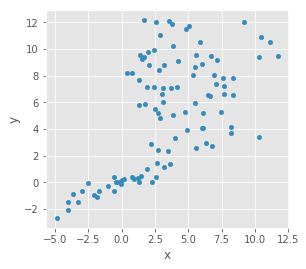

In [9]:
np.random.seed(0)
mean0 = np.array([0, 0])
cov0 = np.array([[5,2],[2,1]])
mean1 = np.array([5, 7])
cov1 = np.array([[8,0],[0,7]])
N = 100
a = 0.7
X = pd.DataFrame(
    np.r_[
        sp.random.multivariate_normal(mean0, cov0, int(N*(1-a))),
        sp.random.multivariate_normal(mean1, cov1, int(N*a))
    ],
    columns=['x', 'y']
)
X.plot(kind='scatter', x='x', y='y').set_aspect('equal')
plt.savefig('1.png', bbox_inches='tight', pad_inches=0)

In [8]:
x = X.values.T
D = 2

# 事前分布
b0 = 1
m0 = np.zeros((D, 1))
W0 = np.diag([0.01, 0.01])
nu0 = 1.1
a0 = 1

In [10]:
def init():
    global mk, Wk, nuk, bk, ak, r, rho, K
    K = 1
    mk = np.random.rand(K, D, 1)
    Wk = np.array([np.diag([0.01, 0.01]) for _ in np.arange(K)])
    nuk = np.repeat(1.1, K)
    bk = np.ones(K)
    ak = np.ones(K)

    r = np.zeros((N, K))
    rho = np.zeros((N, K))